<a href="https://colab.research.google.com/github/nknigam/MachineLearning/blob/master/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

In [5]:
#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/: ['run', 'root', 'bin', 'lib64', 'var', 'tmp', 'mnt', 'lib', 'srv', 'sbin', 'home', 'media', 'usr', 'proc', 'opt', 'boot', 'sys', 'dev', 'etc', 'content', '.dockerenv', 'datalab', 'tools', 'swift', 'tensorflow-1.15.2', 'lib32']
/content: ['.config', 'HDFCBANK.csv', 'sample_data']


# Analyze HDFC Bank daily Stock price

In [6]:
df = pd.read_csv("HDFCBANK.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5184 entries, 0 to 5183
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5184 non-null   object 
 1   Symbol              5184 non-null   object 
 2   Series              5184 non-null   object 
 3   Prev Close          5184 non-null   float64
 4   Open                5184 non-null   float64
 5   High                5184 non-null   float64
 6   Low                 5184 non-null   float64
 7   Last                5184 non-null   float64
 8   Close               5184 non-null   float64
 9   VWAP                5184 non-null   float64
 10  Volume              5184 non-null   int64  
 11  Turnover            5184 non-null   float64
 12  Trades              2334 non-null   float64
 13  Deliverable Volume  4675 non-null   float64
 14  %Deliverble         4675 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 607.6

In [9]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5179,2020-10-26,HDFCBANK,EQ,1235.8,1229.80,1242.00,1204.60,1216.55,1210.90,1222.29,9786023,1.196138e+15,197782.0,4286264.0,0.4380
5180,2020-10-27,HDFCBANK,EQ,1210.9,1226.00,1236.00,1197.85,1235.00,1233.10,1216.83,12158922,1.479529e+15,207342.0,5566363.0,0.4578
5181,2020-10-28,HDFCBANK,EQ,1233.1,1228.00,1232.00,1201.50,1210.30,1209.60,1214.22,8285625,1.006059e+15,202965.0,3816626.0,0.4606
5182,2020-10-29,HDFCBANK,EQ,1209.6,1200.60,1204.45,1178.50,1190.50,1187.20,1189.63,11530152,1.371666e+15,207330.0,4599106.0,0.3989
5183,2020-10-30,HDFCBANK,EQ,1187.2,1182.55,1199.30,1176.35,1182.40,1183.55,1186.31,5761470,6.834879e+14,137766.0,1417497.0,0.2460


In [8]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5.184000e+03,5.184000e+03,2334.000000,4.675000e+03,4675.000000
mean,996.597290,996.897955,1009.320679,983.409587,996.805883,996.795235,996.390808,1.901490e+06,2.144259e+14,74504.353042,1.164452e+06,0.598526
std,639.324343,638.966383,644.991685,633.027057,639.254264,639.223311,639.020034,3.744284e+06,4.317437e+14,86516.143550,1.975154e+06,0.120262
min,157.400000,162.150000,167.900000,157.000000,163.000000,163.400000,161.400000,1.042000e+03,2.291142e+10,807.000000,4.631000e+03,0.177900
25%,468.312500,469.875000,475.600000,461.875000,470.000000,469.112500,468.962500,2.917712e+05,1.505309e+13,26230.750000,2.551265e+05,0.524900
50%,911.600000,915.025000,930.825000,893.325000,912.200000,911.750000,911.855000,9.077695e+05,1.109204e+14,41848.500000,6.098440e+05,0.604300
75%,1384.362500,1390.000000,1409.450000,1360.000000,1388.100000,1384.362500,1384.995000,2.008752e+06,2.051019e+14,86674.750000,1.331341e+06,0.676200
max,2565.800000,2566.000000,2583.300000,2553.700000,2563.000000,2565.800000,2570.700000,1.005650e+08,1.426400e+16,790631.000000,6.669683e+07,1.000000


In [13]:
df['Open'].values

array([ 166.  ,  182.  ,  170.  , ..., 1228.  , 1200.6 , 1182.55])

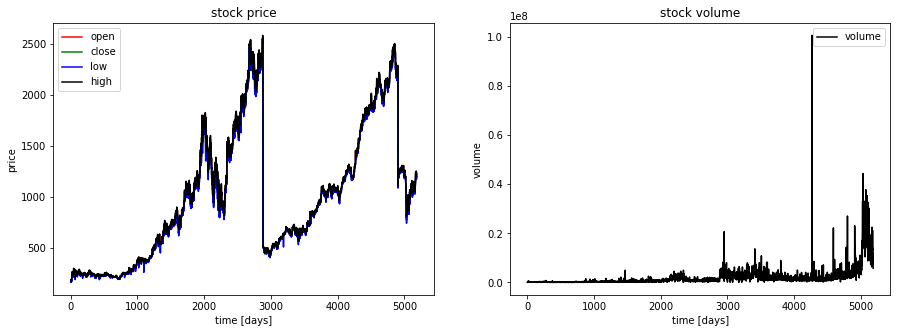

In [15]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df['Open'].values, color='red', label='open')
plt.plot(df['Close'].values, color='green', label='close')
plt.plot(df['Low'].values, color='blue', label='low')
plt.plot(df['High'].values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df['Volume'].values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');